new codes


In [ ]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Series IDs for labour market statistics
series_ids = ['lf2y', 'lf32', 'lf38', 'lf63', 'lf65', 'lf67', 'lf69', 'lf6b', 'lf6d']

# Base URL
base_url = "https://raw.githubusercontent.com/AntoniaDahuabe/AntoniaDahuabe.github.io/refs/heads/main/{series_id}.json"

# Combined data storage
combined_data = pd.DataFrame()

# Loop through each URL
for series_id in series_ids:
    url = base_url.format(series_id=series_id)
    response = requests.get(url)
    if response.status_code == 200:
        # Load JSON response
        data = response.json()

        # Process the JSON for yearly or quarterly data
        if "years" in data:
            series_data = pd.DataFrame(data["years"])
        elif "quarters" in data:
            series_data = pd.DataFrame(data["quarters"])
        else:
            print(f"Unexpected data structure for {series_id}")
            continue

        # Add series ID column
        series_data["series_id"] = series_id

        # Ensure 'value' and 'date' are correctly formatted
        series_data["value"] = pd.to_numeric(series_data["value"], errors="coerce")
        if "years" in data:
            series_data["date"] = pd.to_datetime(series_data["date"], format="%Y", errors="coerce")
        elif "quarters" in data:
            def clean_and_convert_quarter_to_datetime(date_str):
                try:
                    clean_date_str = date_str.strip()
                    year, quarter = clean_date_str.split(" ")
                    quarter = int(quarter[1])  # Extract the quarter number (e.g., Q2 -> 2)
                    quarter_to_month = {1: 1, 2: 4, 3: 7, 4: 10}
                    start_month = quarter_to_month[quarter]
                    return pd.Timestamp(f"{year}-{start_month}-01")
                except Exception as e:
                    print(f"Error parsing date: '{date_str}', {e}")
                    return pd.NaT
            series_data["date"] = series_data["date"].apply(clean_and_convert_quarter_to_datetime)

        # Drop invalid rows
        series_data.dropna(subset=["value", "date"], inplace=True)

        # Combine data
        combined_data = pd.concat([combined_data, series_data], ignore_index=True)
        print(f"Processed data for {series_id}")
    else:
        print(f"Failed to fetch data for {series_id}")

# Normalize the 'value' column
scaler = MinMaxScaler()
combined_data["scaled_value"] = combined_data.groupby("series_id")["value"].transform(
    lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten()
)




Processed data for lf2y
Processed data for lf32
Processed data for lf38
Processed data for lf63
Processed data for lf65
Processed data for lf67
Processed data for lf69
Processed data for lf6b
Processed data for lf6d


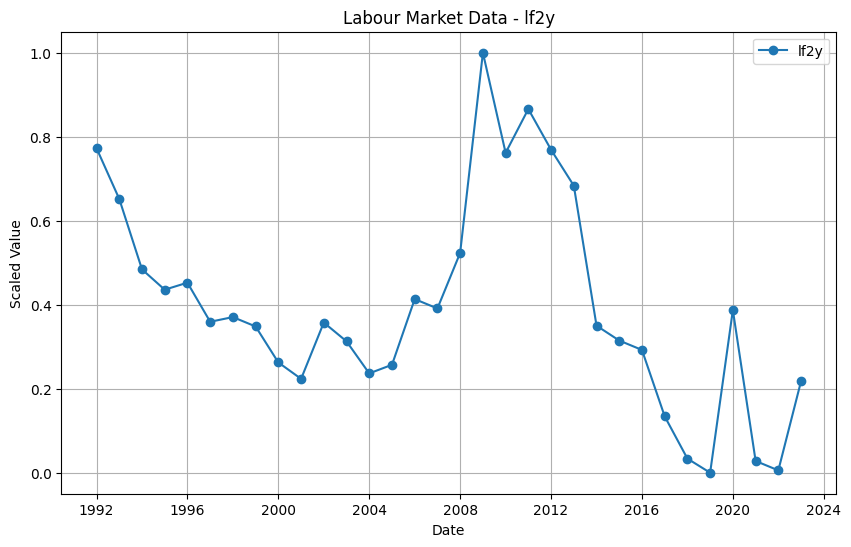

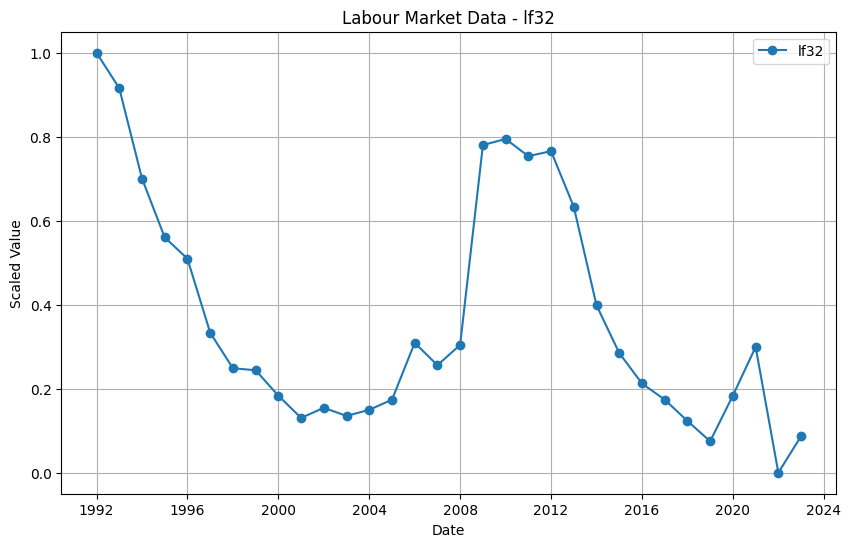

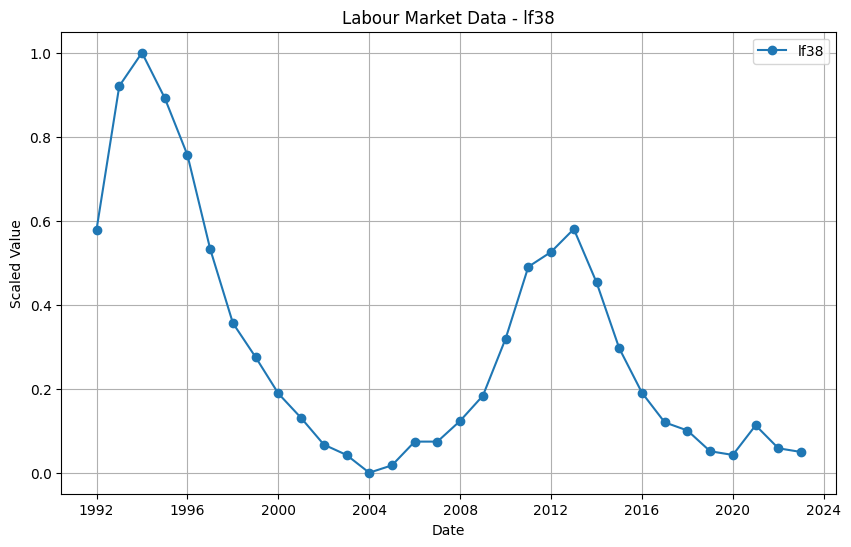

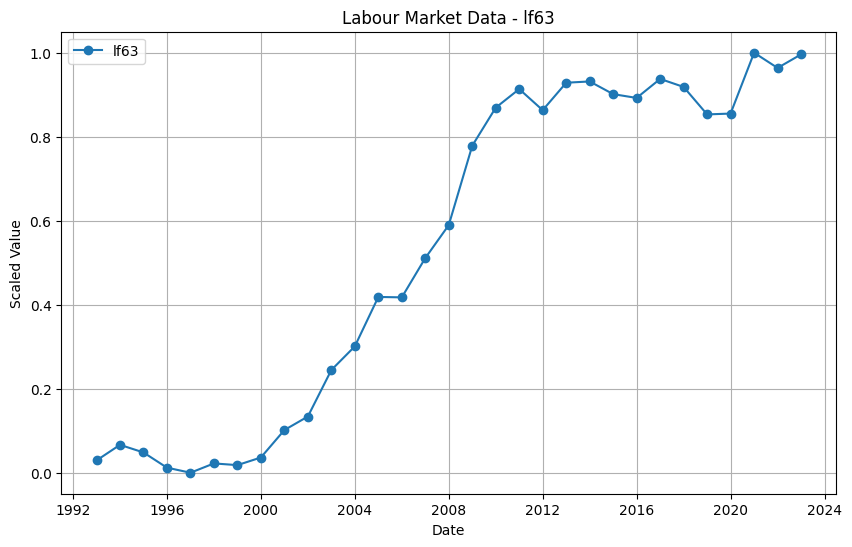

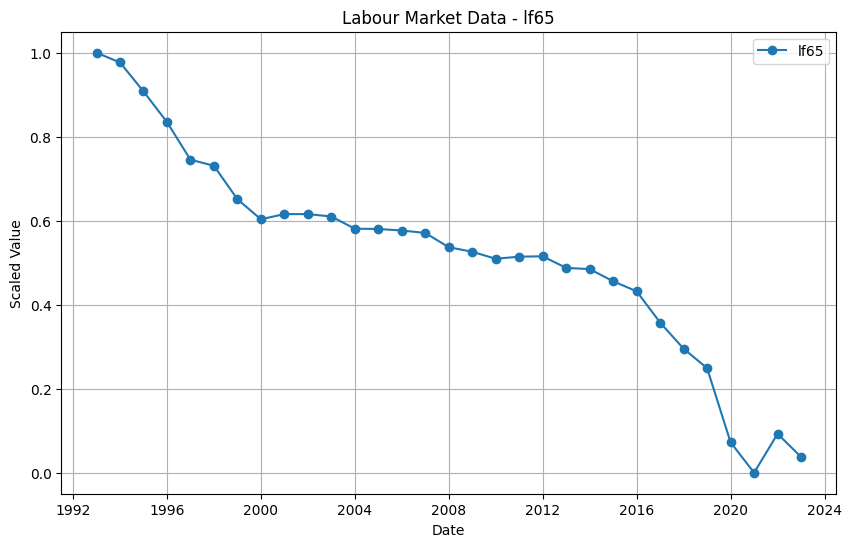

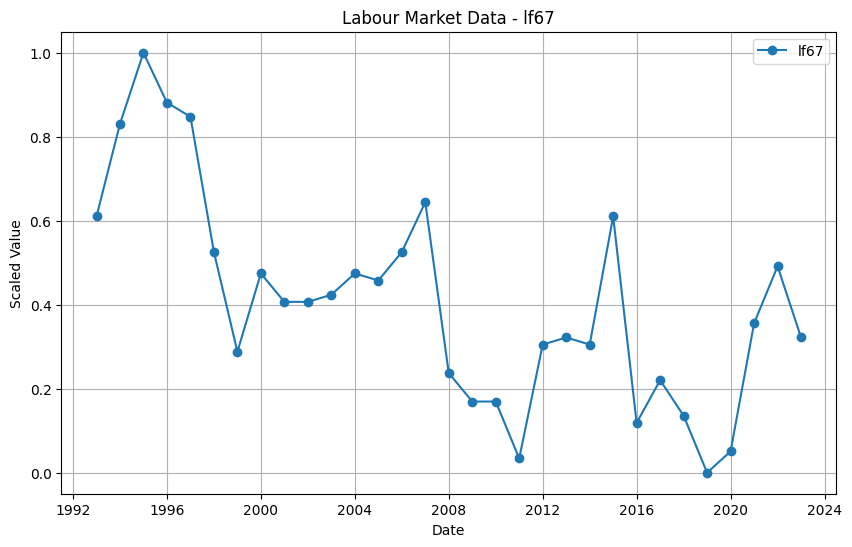

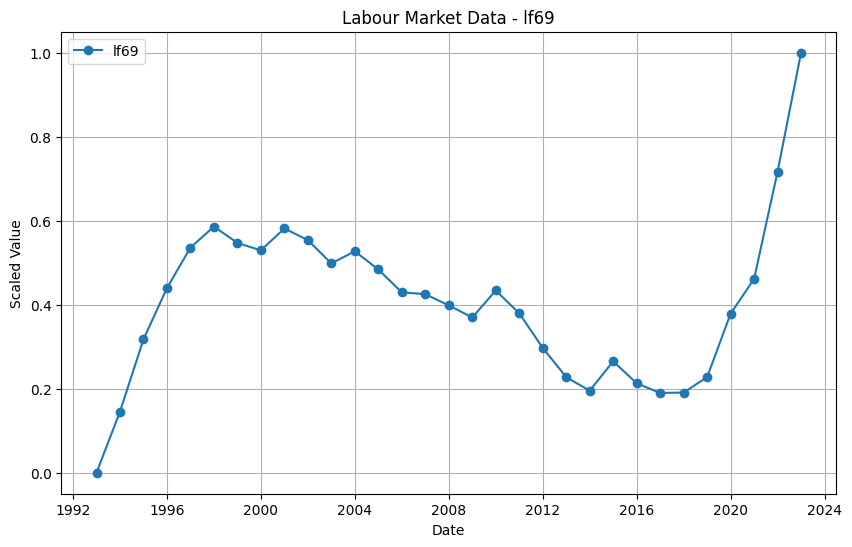

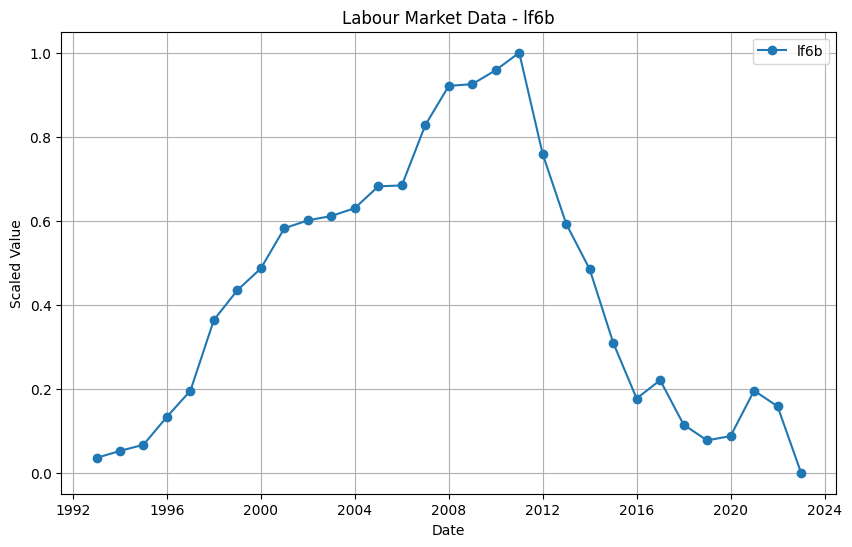

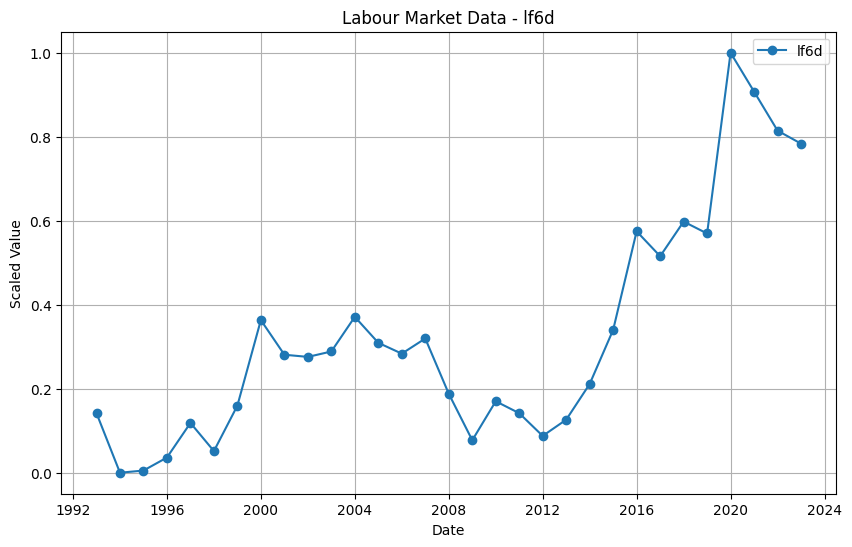

In [ ]:
# Plot data for each series
for series_id, group in combined_data.groupby("series_id"):
    plt.figure(figsize=(10, 6))
    plt.plot(group["date"], group["scaled_value"], marker="o", label=series_id)
    plt.title(f"Labour Market Data - {series_id}")
    plt.xlabel("Date")
    plt.ylabel("Scaled Value")
    plt.grid(True)
    plt.legend()
    plt.savefig(f"plots/{series_id}.png")
    plt.show()

**Dashboard**

In [2]:
from dash import Dash, dcc, html
import plotly.express as px
import pandas as pd
import requests
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Series IDs and titles for labour market statistics
series_info = {
    'lf2y': "LFS: ILO unemployed up to 6 months: UK: All: Aged 16-64: Thousands: SA",
    'lf32': "LFS: ILO unemployed over 6-12 months: UK: All: Aged 16-64: Thousands: SA",
    'lf38': "LFS: ILO unemployed over 24 months: UK: All: Aged 16-64: Thousands: SA",
    'lf63': "LFS: Econ. inactivity reasons: Students: UK: 16-64: 000s: SA",
    'lf65': "LFS: Econ. inactivity reasons: Looking after family/home: UK: 16-64: 000s: SA",
    'lf67': "LFS: Econ. inactivity reasons: Temp sick: UK: 16-64: 000s: SA",
    'lf69': "LFS: Econ. inactivity reasons: Long Term Sick: UK: 16-64:000s:SA",
    'lf6b': "LFS: Econ. inactivity reasons: Retired: UK: 16-64:SA",
    'lf6d': "LFS: Econ. inactivity reasons: Other: UK: 16-64:000s:SA"
}

# Base URL
base_url = "https://raw.githubusercontent.com/AntoniaDahuabe/AntoniaDahuabe.github.io/refs/heads/main/{series_id}.json"

# Combined data storage
combined_data = pd.DataFrame()

# Loop through each URL
for series_id in series_info.keys():
    url = base_url.format(series_id=series_id)
    response = requests.get(url)
    if response.status_code == 200:
        # Load JSON response
        data = response.json()

        # Process the JSON for yearly or quarterly data
        if "years" in data:
            series_data = pd.DataFrame(data["years"])
        elif "quarters" in data:
            series_data = pd.DataFrame(data["quarters"])
        else:
            print(f"Unexpected data structure for {series_id}")
            continue

        # Add series ID column
        series_data["series_id"] = series_id

        # Ensure 'value' and 'date' are correctly formatted
        series_data["value"] = pd.to_numeric(series_data["value"], errors="coerce")
        if "years" in data:
            series_data["date"] = pd.to_datetime(series_data["date"], format="%Y", errors="coerce")
        elif "quarters" in data:
            def clean_and_convert_quarter_to_datetime(date_str):
                try:
                    clean_date_str = date_str.strip()
                    year, quarter = clean_date_str.split(" ")
                    quarter = int(quarter[1])  # Extract the quarter number (e.g., Q2 -> 2)
                    quarter_to_month = {1: 1, 2: 4, 3: 7, 4: 10}
                    start_month = quarter_to_month[quarter]
                    return pd.Timestamp(f"{year}-{start_month}-01")
                except Exception as e:
                    print(f"Error parsing date: '{date_str}', {e}")
                    return pd.NaT
            series_data["date"] = series_data["date"].apply(clean_and_convert_quarter_to_datetime)

        # Drop invalid rows
        series_data.dropna(subset=["value", "date"], inplace=True)

        # Combine data
        combined_data = pd.concat([combined_data, series_data], ignore_index=True)
        print(f"Processed data for {series_id}")
    else:
        print(f"Failed to fetch data for {series_id}")

# Normalize the 'value' column
scaler = MinMaxScaler()
combined_data["scaled_value"] = combined_data.groupby("series_id")["value"].transform(
    lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten()
)

# Dash App for Interactive Visualization
app = Dash(__name__)

# Generate plots for each series_id in a single column layout
charts = []
for series_id, group in combined_data.groupby("series_id"):
    fig = px.line(
        group,
        x="date",
        y="value",
        title=series_info[series_id],
        template="plotly",
    )
    fig.update_traces(line=dict(color="teal"))
    fig.update_layout(
        title=dict(font=dict(size=14, color="#d63384")),
        plot_bgcolor="white",
        paper_bgcolor="white",
        height=300,  # Control height of each chart
        xaxis=dict(showgrid=True, gridcolor="lightgrey"),
        yaxis=dict(showgrid=True, gridcolor="lightgrey")
    )
    charts.append(html.Div(dcc.Graph(figure=fig), style={"marginBottom": "20px"}))

# Define app layout
app.layout = html.Div([
    html.H1("Labour Market Dashboard", style={"textAlign": "center", "color": "teal"}),
    html.Div(charts, style={"width": "80%", "margin": "0 auto"}),
], style={"backgroundColor": "#f4f4f4", "padding": "20px"})

if __name__ == "__main__":
    app.run_server(debug=True)

Processed data for lf2y
Processed data for lf32
Processed data for lf38
Processed data for lf63
Processed data for lf65
Processed data for lf67
Processed data for lf69
Processed data for lf6b
Processed data for lf6d


<IPython.core.display.Javascript object>

**Save**

In [3]:
import plotly.express as px

# Save the dashboard as a standalone HTML file
with open("labour_market_dashboard.html", "w") as f:
    for series_id, group in combined_data.groupby("series_id"):
        fig = px.line(
            group,
            x="date",
            y="value",
            title=series_info[series_id],
            template="plotly",
        )
        fig.update_traces(line=dict(color="teal"))
        fig.update_layout(
            title=dict(font=dict(size=14, color="#d63384")),
            plot_bgcolor="white",
            paper_bgcolor="white",
            height=300,
            xaxis=dict(showgrid=True, gridcolor="lightgrey"),
            yaxis=dict(showgrid=True, gridcolor="lightgrey"),
        )
        # Write each chart's HTML to the file
        f.write(fig.to_html(full_html=False, include_plotlyjs="cdn"))

print("Dashboard saved as 'labour_market_dashboard.html'")


Dashboard saved as 'labour_market_dashboard.html'
